# Long Short Term Memory(LSTM) Implementation in Python

#### Long Short Term Memory
Long Short-Term Memory (LSTM) networks are a type of RNN specifically designed to capture long term dependencies in sequential data. LSTMs use gating mechanisms to control the flow of information, which helps prevent the vanishing gradient problem that standard RNNs suffer from. They are commonly used in tasks like language modeling, machine translation, and time series prediction.

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 106ms/step - accuracy: 0.7202 - loss: 0.5242 - val_accuracy: 0.8552 - val_loss: 0.3462
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 106ms/step - accuracy: 0.8989 - loss: 0.2600 - val_accuracy: 0.8365 - val_loss: 0.3988
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 86s 110ms/step - accuracy: 0.9285 - loss: 0.1932 - val_accuracy: 0.8723 - val_loss: 0.3164
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 106ms/step - accuracy: 0.9451 - loss: 0.1603 - val_accuracy: 0.8620 - val_loss: 0.3558
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 86s 110ms/step - accuracy: 0.9462 - loss: 0.1504 - val_accuracy: 0.8546 - val_loss: 0.4176
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 31ms/step - accuracy: 0.8543 - loss: 0.4224
Test loss: 0.41764795780181885
Test accuracy: 0.8546000123023987


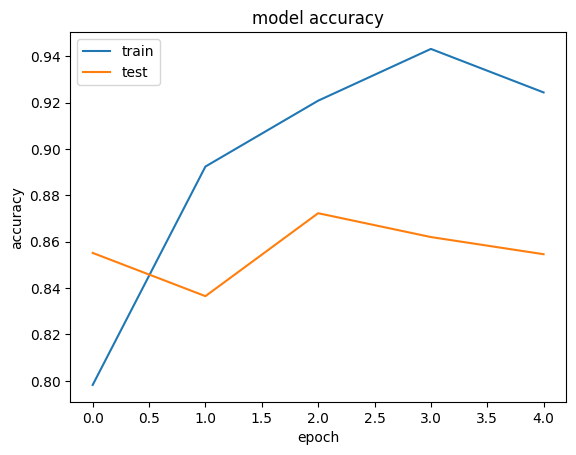

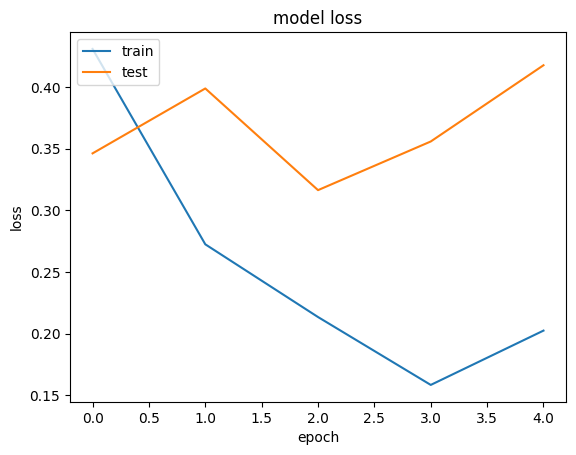

In [2]:
# import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

# load and preprocess the IMDB dataset
max_features = 10000 #vocab size
max_len = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

# define the LSTM model
model = models.Sequential([
    layers.Embedding(max_features, 32, input_length=max_len),
    layers.LSTM(32),
    layers.Dense(1, activation='sigmoid')
])

# compile and train the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

# evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

# visualise the model 
import matplotlib.pyplot as plt
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()